# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [3]:
# Import numpy and pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [4]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [5]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


In [7]:
#No hay NaNs

How many rows and columns are in our data?

In [8]:
sensor.shape

(1751, 12)

In [9]:
#Hay 1752 filas y 12 columnas

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [10]:
dates = pd.date_range("01/01/2018 00:00:00", "01/01/2018 00:29:10", periods=1751)
freq = pd.infer_freq(dates)
dates.freq = freq
print(freq)

S


In [11]:
dates
#len(dates)

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [12]:
sensor.index = dates

In [13]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

<AxesSubplot:>

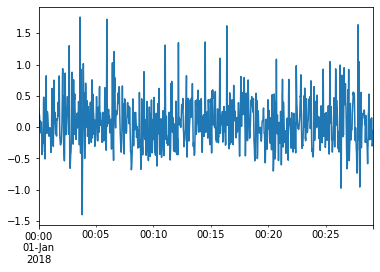

In [14]:
sensor["userAcceleration.x"].plot()

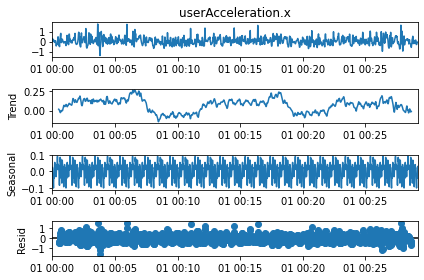

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(sensor["userAcceleration.x"], model="additive", period=60)
res.plot();

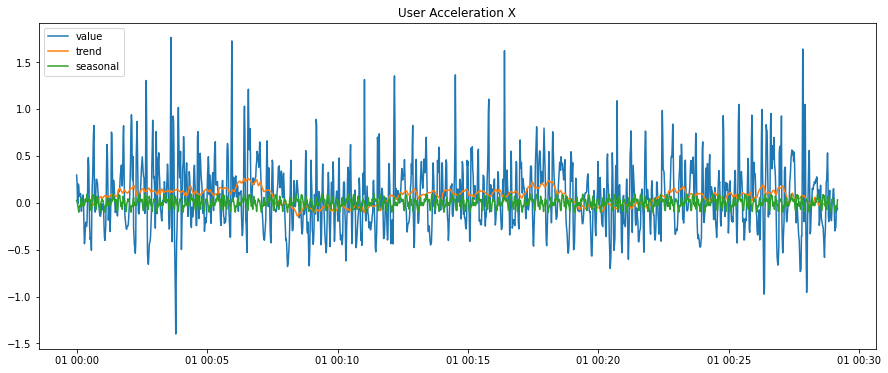

In [16]:
plt.figure(figsize=(15,6))
plt.title("User Acceleration X")

plt.plot(sensor["userAcceleration.x"], label="value")

plt.plot(res.trend, label="trend")

plt.plot(res.seasonal, label="seasonal")

# plt.plot(res.resid, label="residual", c="red")

plt.legend();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

<AxesSubplot:>

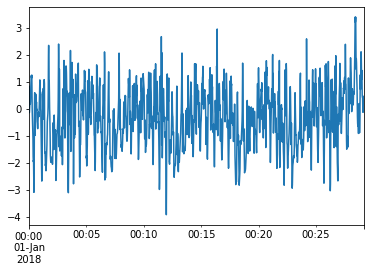

In [17]:
sensor["rotationRate.x"].plot()

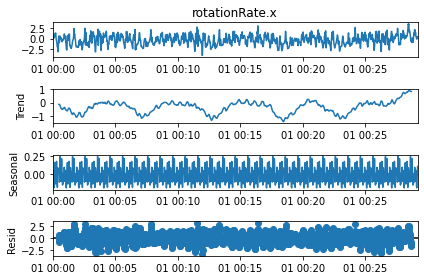

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
res2 = seasonal_decompose(sensor["rotationRate.x"], model="additive", period=60)
res2.plot();

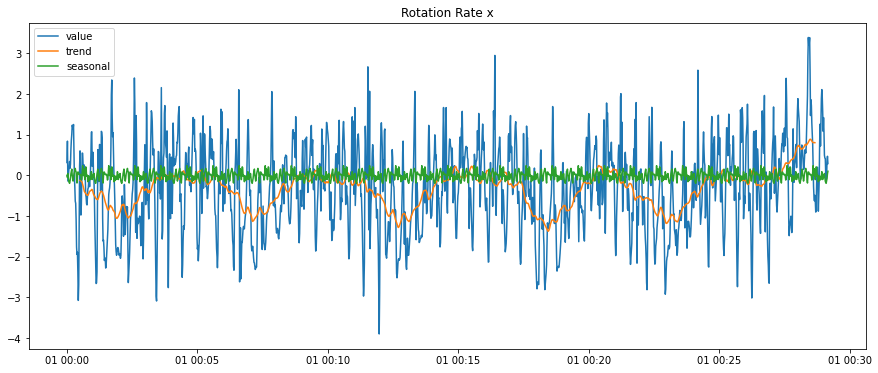

In [19]:
plt.figure(figsize=(15,6))
plt.title("Rotation Rate x")

plt.plot(sensor["rotationRate.x"], label="value")

plt.plot(res2.trend, label="trend")

plt.plot(res2.seasonal, label="seasonal")

# plt.plot(res.resid, label="residual", c="red")

plt.legend();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

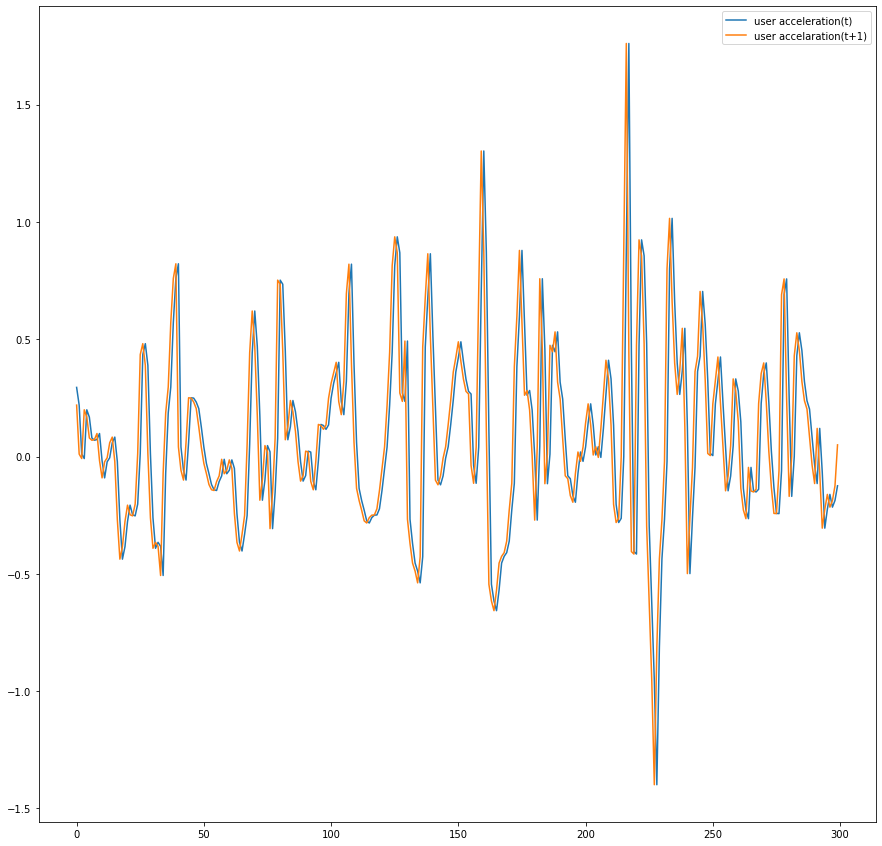

In [20]:
sensor_t = sensor["userAcceleration.x"][:-1]
sensor_t_plus_1 = sensor["userAcceleration.x"][1:]
plt.figure(figsize=(15,15))
plt.plot(sensor_t[:300].values, label="user acceleration(t)")
plt.plot(sensor_t_plus_1[:300].values, label="user accelaration(t+1)")
plt.legend();

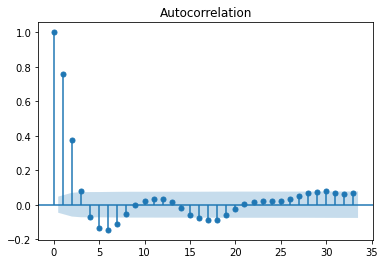

In [21]:
#autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sensor["userAcceleration.x"]);

Create a lag plot for `rotationRate.x`

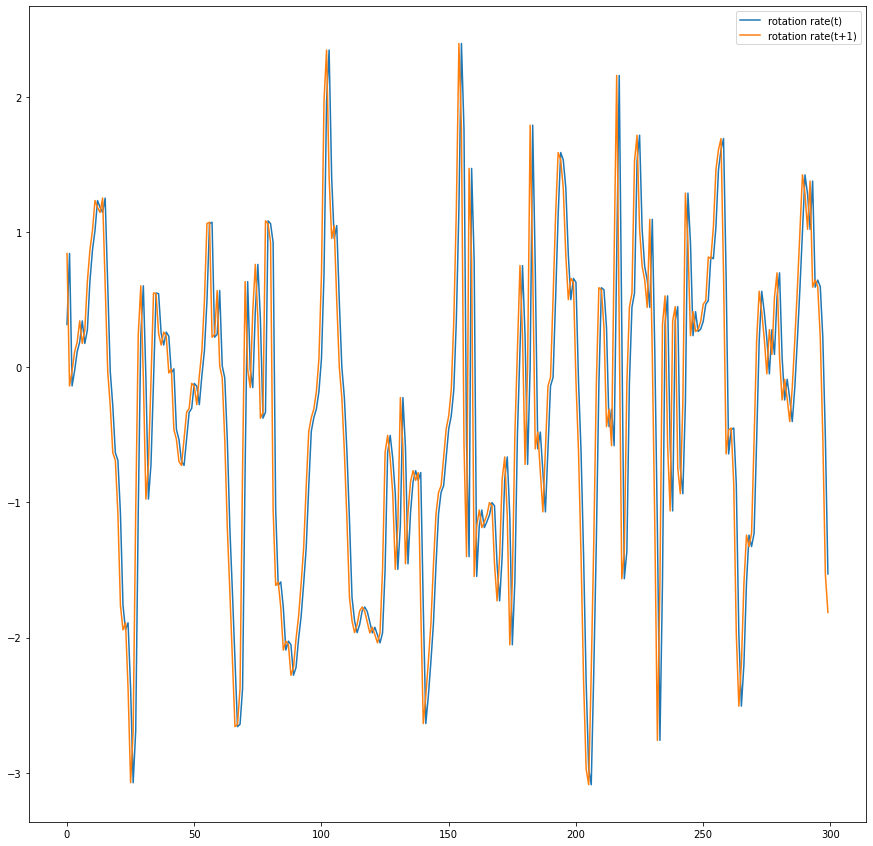

In [22]:
sensor_t = sensor["rotationRate.x"][:-1]
sensor_t_plus_1 = sensor["rotationRate.x"][1:]
plt.figure(figsize=(15,15))
plt.plot(sensor_t[:300].values, label="rotation rate(t)")
plt.plot(sensor_t_plus_1[:300].values, label="rotation rate(t+1)")
plt.legend();

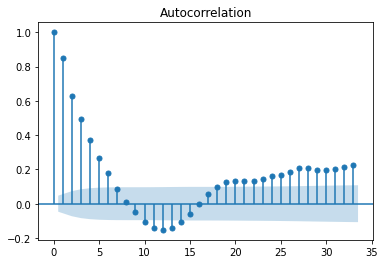

In [23]:
plot_acf(sensor["rotationRate.x"]);

What are your conclusions from both visualizations?

**RESPUESTA: Si obserbamos las gráficas de lag ambas guardan bastante correlación casí las lineas se solapan. Sin embargo, si medimos la autocorrelación de la serie a nivel global, mediante la función acf se muestra como la primera variable de userAcceleration tiene especialmente las dos primeras una autocorrelación positiva mientras que el resto guarda una correlación negativa con valores bastante cercanos al 0. En el caso de la segunda son también los primeros (especialmente los seis primeros) los que guardan una relación positiva, por otro lado, también encontramos algunas relaciones negativas con valores de nuevo pequeños.*

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [24]:
from statsmodels.tsa.stattools import adfuller
var1 = adfuller(sensor["userAcceleration.x"])
var1

(-17.957994086169762,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [25]:
var2 = adfuller(sensor["rotationRate.x"])
var2

(-5.269860625086418,
 6.320230335912299e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

**RESPUESTA: Nuestro data es estacionario, lo que significa que la varianza y la tendencia permanecen constantes en el tiempo*

In [26]:
#confirmación pvalue < 0,05
adf, pvalue, usedlag, nobs, critical_values, icbest = var1
pvalue

2.823439483037483e-30

In [27]:
adf, pvalue, usedlag, nobs, critical_values, icbest = var2
pvalue

6.320230335912299e-06

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [28]:
from statsmodels.tsa.arima_model import ARMA
train = sensor["userAcceleration.x"][:-10]
test = sensor["userAcceleration.x"][-10:]

In [35]:
#plot_acf(train);

In [40]:
#print(freq)

In [36]:
order = (2,1)
arma = ARMA(train,order=order, freq="S")
arma = arma.fit()

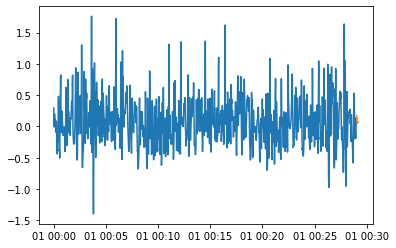

In [37]:
predict = arma.predict(len(train),len(train)+9)
plt.plot(train)
plt.plot(predict)

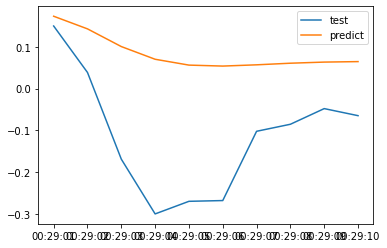

In [42]:
#plt.plot(train, label = "train")
plt.plot(test, label = "test")
plt.plot(predict, label = "predict")
plt.legend()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predict, test)

0.05075630705950825